In [1]:
import pandas as pd 
import streamlit as st 
import plotly.express as pt 
import math as mt
from math import factorial
#from scipy import stats as st
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import numpy as np
from scipy.stats import ttest_ind, levene, stats


En df1 ya que contiene fechas en start_ts decidí hacer un parse desde que se lee. Para así tener el tipo de datos correcto. 

In [2]:
df = pd.read_csv('moved_project_sql_result_01.csv')
df0=pd.read_csv('moved_project_sql_result_04.csv')
df1=pd.read_csv('moved_project_sql_result_07.csv', parse_dates=['start_ts'])


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [4]:
df0.info()
df0.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [5]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


,start_ts,duration_seconds
count,1068,1068.000000
mean,2017-11-11 11:53:12.134831360,2071.731273
min,2017-11-04 00:00:00,0.000000
25%,2017-11-04 15:00:00,1438.250000
50%,2017-11-11 09:00:00,1980.000000
75%,2017-11-18 05:00:00,2580.000000
max,2017-11-25 23:00:00,7440.000000
std,NaN,769.461125


In [6]:
df1

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


Aqui en este paso procedí a concatenar los 2 primeros datasets, para poder hacer una analisis correcto, en el que se incluyeran todas las columnas.

In [ ]:
new_df = pd.concat([df, df0], axis=1, ignore_index=True)
new_df.columns = ['company_name', 'trips_amount', 'dropoff_location_name', 'average_trips']

new_df


,company_name,trips_amount,dropoff_location_name,average_trips
0,Flash Cab,19558.0,Loop,10727.466667
1,Taxi Affiliation Services,11422.0,River North,9523.666667
2,Medallion Leasin,10367.0,Streeterville,6664.666667
3,Yellow Cab,9888.0,West Loop,5163.666667
4,Taxi Affiliation Service Yellow,9299.0,O'Hare,2546.900000
...,...,...,...,...
89,NaN,NaN,Mount Greenwood,3.137931
90,NaN,NaN,Hegewisch,3.117647
91,NaN,NaN,Burnside,2.333333
92,NaN,NaN,East Side,1.961538


Aquí use un dropna por la diferencia de valores entre 64 y 94 valores, evitando problemas a la hora de graficar y asi poder trabajar con datos confiables y completos. Despues procedí a hacer una grafica de barras, 

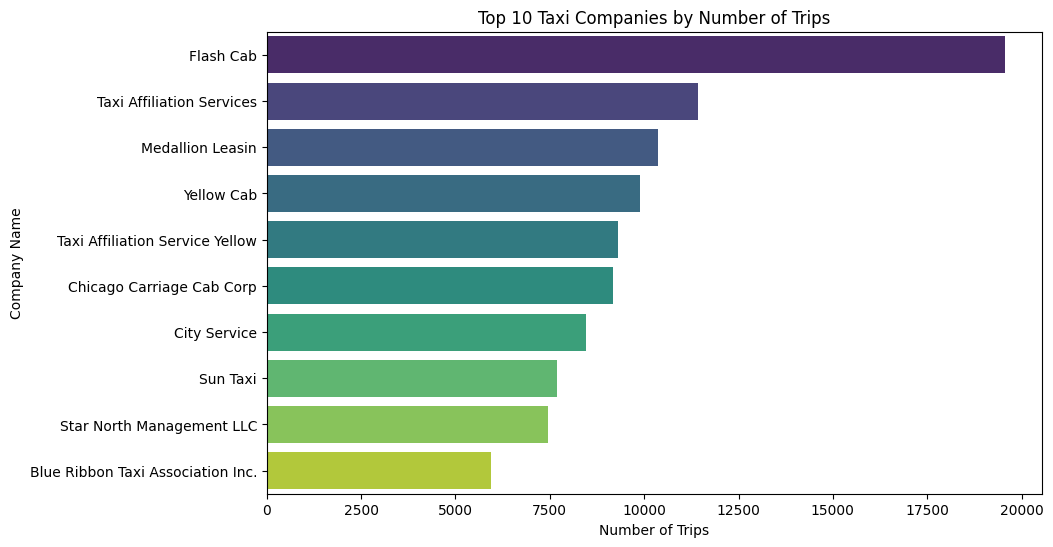

In [8]:
df_clean = new_df[['company_name', 'trips_amount']].dropna()

top_10_companies = df_clean.sort_values(by="trips_amount", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='trips_amount', y='company_name', data=top_10_companies, hue='company_name', palette='viridis', legend=False)

plt.title("Top 10 Taxi Companies by Number of Trips")
plt.xlabel("Number of Trips")
plt.ylabel("Company Name")
plt.show()

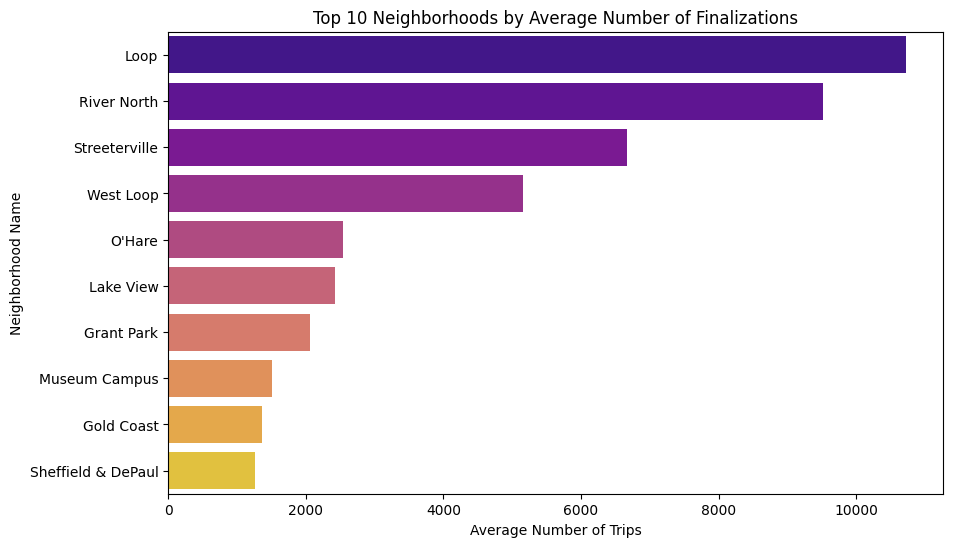

In [9]:
df0_clean = new_df[['dropoff_location_name', 'average_trips']].dropna()

# Sort by the average number of trips and get the top 10
top_10_neighborhoods = df0_clean.sort_values(by="average_trips", ascending=False).head(10)

# Plotting Top 10 Neighborhoods by Number of Finalizations
plt.figure(figsize=(10, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_neighborhoods, hue='dropoff_location_name', palette='plasma')

# Adding titles and labels
plt.title("Top 10 Neighborhoods by Average Number of Finalizations")
plt.xlabel("Average Number of Trips")
plt.ylabel("Neighborhood Name")
plt.show()

En el siguiente código lo que hice fue usar start_ts separando el día donde fuera igual al día 5 teniendo en cuenta que la semana empieza en 0=monday, haciendo una nueva columna llamada is_rainy en la que checa que las columnas contengan la palabra bad, y que no sea sensible a mayusculas o minusculas, agregando True si existe la palabra bad y false si no es el caso.

In [10]:
df1.sample(20)
df1['weekday']=df1['start_ts'].dt.weekday 
df_saturdays = df1[df1['weekday'] == 5]
df_saturdays['is_rainy'] = df_saturdays['weather_conditions'].str.contains('Bad', case=False, na=False)
print(df_saturdays[['start_ts', 'weather_conditions', 'duration_seconds', 'is_rainy']].head())
# Separate the data into rainy and non-rainy Saturdays
rainy_saturdays = df_saturdays[df_saturdays['is_rainy'] == True]
non_rainy_saturdays = df_saturdays[df_saturdays['is_rainy'] == False]

# Check the number of records in each group
print("Rainy Saturdays:", len(rainy_saturdays))
print("Non-Rainy Saturdays:", len(non_rainy_saturdays))


             start_ts weather_conditions  duration_seconds  is_rainy
0 2017-11-25 16:00:00               Good            2410.0     False
1 2017-11-25 14:00:00               Good            1920.0     False
2 2017-11-25 12:00:00               Good            1543.0     False
3 2017-11-04 10:00:00               Good            2512.0     False
4 2017-11-11 07:00:00               Good            1440.0     False
Rainy Saturdays: 180
Non-Rainy Saturdays: 888


La hipótesis nula se hizo basada en la idea de que no había cambios en el tiempo promedio de viaje en dias lluviosos y no lluviosos y la alternativa lo contrario, que si que había diferencia en el tiempo promedio de viaje.
Dado que estamos usando 2 conjuntos de datos independientes se procedio a usar la prueba t-test, el nivel de significancia que se uso fue el valor de 0.05, si el valor p-value es menor a este, se rechaza H0.
Si H0 es menor a p-value significa que los dias lluviosos si tienen un tiempo diferente y en el caso contrario de que no sea menor, que son iguales los tiempos.

In [ ]:
t_stat, p_value = stats.ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'])

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 6.946177714041499
P-value: 6.517970327099473e-12


C:\Users\HL4ev\AppData\Local\Temp\ipykernel_30608\3432094855.py:2: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat, p_value = stats.ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'])


C:\Users\HL4ev\AppData\Local\Temp\ipykernel_30608\2532555443.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainy_saturdays['weather_type'] = 'Rainy'
C:\Users\HL4ev\AppData\Local\Temp\ipykernel_30608\2532555443.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_rainy_saturdays['weather_type'] = 'Non-Rainy'


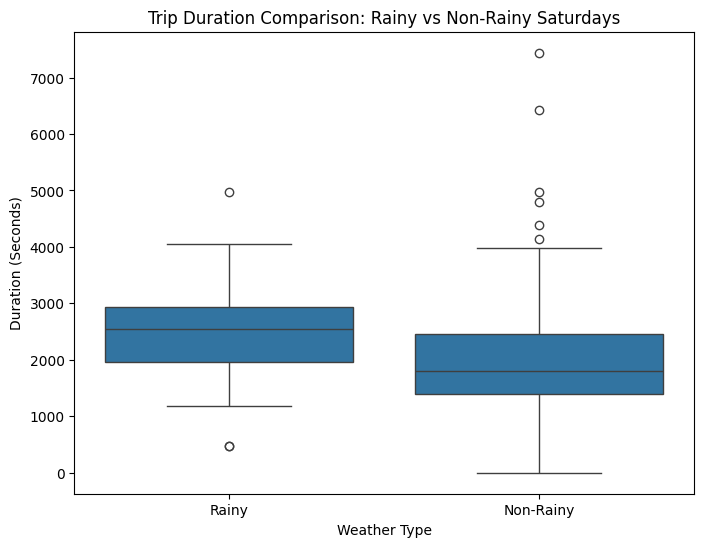

In [ ]:
rainy_saturdays['weather_type'] = 'Rainy'
non_rainy_saturdays['weather_type'] = 'Non-Rainy'

combined_df = pd.concat([rainy_saturdays[['duration_seconds', 'weather_type']], 
                        non_rainy_saturdays[['duration_seconds', 'weather_type']]])

plt.figure(figsize=(8, 6))
sns.boxplot(x='weather_type', y='duration_seconds', data=combined_df)
plt.title('Trip Duration Comparison: Rainy vs Non-Rainy Saturdays')
plt.xlabel('Weather Type')
plt.ylabel('Duration (Seconds)')
plt.show()


La conclusión de esto fue que si, los tiempos son diferentes en dias lluviosos. 

Conclusión:

Este análisis puede aportar insights valiosos para la planificación de actividades y servicios, particularmente en sectores como transporte, eventos o comercio minorista.
Por ejemplo, si se observa una reducción en la duración de eventos debido al clima, las empresas podrían ajustar sus estrategias operativas o promocionales.

Optimización de recursos:

En un contexto de transporte o planificación de eventos, estas conclusiones pueden guiar decisiones como:
Aumentar la disponibilidad de recursos en condiciones climáticas adversas (e.g., sábados lluviosos).
Programar mantenimientos o períodos de inactividad en días de bajo impacto climático.

Estrategias de marketing:

Los insights sobre la influencia del clima y la duración de los eventos pueden ayudar a diseñar campañas específicas, como descuentos en días lluviosos para incentivar la participación.